In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import wasserstein_distance as wsd

In [1]:
# Raw samples should be downloaded in matlab format from https://data.fz-juelich.de/dataset.xhtml?persistentId=doi%3A10.26165%2FJUELICH-DATA%2FBJK8GJ and flux_data2csv.m used to convert them to csv

In [10]:
M0_single_names = pd.read_csv('M0_freeNames.csv')['names'].tolist()
M0_set_names = pd.read_csv('M0-BMA_freeNames.csv')['names'].tolist()
Mm1_single_names = pd.read_csv('M-1_freeNames.csv')['names'].tolist()
Mm1_set_names = pd.read_csv('M-1-BMA_freeNames.csv')['names'].tolist()
M1_single_names = pd.read_csv('M1_freeNames.csv')['names'].tolist()
M2_single_names = pd.read_csv('M2_freeNames.csv')['names'].tolist()

M0_single_fluxes = pd.read_csv('M0_freeFluxes.csv', header=None)
M0_set_fluxes = pd.read_csv('M0-BMA_freeFluxes.csv', header=None)
Mm1_single_fluxes = pd.read_csv('M-1_freeFluxes.csv', header=None)
Mm1_set_fluxes = pd.read_csv('M-1-BMA_freeFluxes.csv', header=None)
M1_single_fluxes = pd.read_csv('M1_freeFluxes.csv', header=None)
M2_single_fluxes = pd.read_csv('M2_freeFluxes.csv', header=None)

In [11]:
print(Mm1_single_names.index(Mm1_single_names[3]))

3


In [12]:
distances = []
for flux_name in M0_single_names:
        
    try:
        M0_index = M0_single_names.index(flux_name)
    except ValueError:
        M0_index = -1
    try:
        M1_index = M1_single_names.index(flux_name)
    except ValueError:
        M1_index = -1
    try:
        M2_index = M2_single_names.index(flux_name)
    except ValueError:
        M2_index = -1
    try:
        Mm1_index = Mm1_single_names.index(flux_name)
    except ValueError:
        Mm1_index = -1
    try:
        M0_set_index = M0_set_names.index(flux_name)
    except ValueError:
        M0_set_index = -1
    try:
        Mm1_set_index = Mm1_set_names.index(flux_name)
    except ValueError:
        Mm1_set_index = -1
    
    distance_matrix = np.zeros((6,6))
    
    # col 0
    distance_matrix[0, 0] = wsd(
            M0_single_fluxes.iloc[:,M0_index],
            M0_single_fluxes.iloc[:,M0_index],
        ) if M0_index != -1 else np.nan
    distance_matrix[1, 0] = wsd(
            M1_single_fluxes.iloc[:,M1_index],
            M0_single_fluxes.iloc[:,M0_index],
        ) if M1_index != -1 and M0_index !=-1 else np.nan
    distance_matrix[2, 0] = wsd(
            M2_single_fluxes.iloc[:,M2_index],
            M0_single_fluxes.iloc[:,M0_index],
        ) if M2_index != -1 and M0_index !=-1 else np.nan
    distance_matrix[3, 0] = wsd(
            Mm1_single_fluxes.iloc[:,Mm1_index],
            M0_single_fluxes.iloc[:,M0_index],
        ) if Mm1_index != -1 and M0_index !=-1 else np.nan
    distance_matrix[4, 0] = wsd(
            M0_set_fluxes.iloc[:,M0_set_index],
            M0_single_fluxes.iloc[:,M0_index],
        ) if M0_set_index != -1 and M0_index !=-1 else np.nan
    distance_matrix[5, 0] = wsd(
            Mm1_set_fluxes.iloc[:,Mm1_set_index],
            M0_single_fluxes.iloc[:,M0_index],
        ) if Mm1_set_index != -1 and M0_index !=-1 else np.nan
    
    # col 1
    distance_matrix[0, 1] = distance_matrix[1, 0]
    
    distance_matrix[1, 1] = wsd(
            M1_single_fluxes.iloc[:,M1_index],
            M1_single_fluxes.iloc[:,M1_index],
        ) if M1_index != -1 else np.nan
    distance_matrix[2, 1] = wsd(
            M2_single_fluxes.iloc[:,M2_index],
            M1_single_fluxes.iloc[:,M1_index],
        ) if M2_index != -1 and M1_index !=-1 else np.nan
    distance_matrix[3, 1] = wsd(
            Mm1_single_fluxes.iloc[:,Mm1_index],
            M1_single_fluxes.iloc[:,M1_index],
        ) if Mm1_index != -1 and M1_index !=-1 else np.nan
    distance_matrix[4, 1] = wsd(
            M0_set_fluxes.iloc[:,M0_set_index],
            M1_single_fluxes.iloc[:,M1_index],
        ) if M0_set_index != -1 and M1_index !=-1 else np.nan
    distance_matrix[5, 1] = wsd(
            Mm1_set_fluxes.iloc[:,Mm1_set_index],
            M1_single_fluxes.iloc[:,M1_index],
        ) if Mm1_set_index != -1 and M1_index !=-1 else np.nan
    
    # col 2
    distance_matrix[0, 2] = distance_matrix[2, 0]
    distance_matrix[1, 2] = distance_matrix[2, 1]
    
    distance_matrix[2, 2] = wsd(
            M2_single_fluxes.iloc[:,M2_index],
            M2_single_fluxes.iloc[:,M2_index],
        ) if M2_index != -1 else np.nan
    distance_matrix[3, 2] = wsd(
            Mm1_single_fluxes.iloc[:,Mm1_index],
            M2_single_fluxes.iloc[:,M2_index],
        ) if Mm1_index != -1 and M2_index !=-1 else np.nan
    distance_matrix[4, 2] = wsd(
            M0_set_fluxes.iloc[:,M0_set_index],
            M2_single_fluxes.iloc[:,M2_index],
        ) if M0_set_index != -1 and M2_index !=-1 else np.nan
    distance_matrix[5, 2] = wsd(
            Mm1_set_fluxes.iloc[:,Mm1_set_index],
            M2_single_fluxes.iloc[:,M2_index],
        ) if Mm1_set_index != -1 and M2_index !=-1 else np.nan
    
    # col 3
    distance_matrix[0, 3] = distance_matrix[3, 0]
    distance_matrix[1, 3] = distance_matrix[3, 1]
    distance_matrix[2, 3] = distance_matrix[3, 2]
    
    distance_matrix[3, 3] = wsd(
            Mm1_single_fluxes.iloc[:,Mm1_index],
            Mm1_single_fluxes.iloc[:,Mm1_index],
        ) if Mm1_index != -1 else np.nan
    distance_matrix[4, 3] = wsd(
            M0_set_fluxes.iloc[:,M0_set_index],
            Mm1_single_fluxes.iloc[:,Mm1_index],
        ) if M0_set_index!= -1 and Mm1_index != -1 else np.nan
    distance_matrix[5, 3] = wsd(
            Mm1_set_fluxes.iloc[:,Mm1_set_index],
            Mm1_single_fluxes.iloc[:,Mm1_index],
        ) if Mm1_set_index!= -1 and  Mm1_index != -1 else np.nan
    
    # col 4
    distance_matrix[0, 4] = distance_matrix[4, 0]
    distance_matrix[1, 4] = distance_matrix[4, 1]
    distance_matrix[2, 4] = distance_matrix[4, 2]
    distance_matrix[3, 4] = distance_matrix[4, 3]
    distance_matrix[4, 4] = wsd(
            M0_set_fluxes.iloc[:,M0_set_index],
            M0_set_fluxes.iloc[:,M0_set_index],
        ) if M0_set_index!= -1 and M0_set_index != -1 else np.nan
    distance_matrix[5, 4] = wsd(
            Mm1_set_fluxes.iloc[:,Mm1_set_index],
            M0_set_fluxes.iloc[:,M0_set_index],
        ) if Mm1_set_index!= -1 and M0_set_index != -1 else np.nan
    
    # col 5
    distance_matrix[0, 5] = distance_matrix[5, 0]
    distance_matrix[1, 5] = distance_matrix[5, 1]
    distance_matrix[2, 5] = distance_matrix[5, 2]
    distance_matrix[3, 5] = distance_matrix[5, 3]
    distance_matrix[4, 5] = distance_matrix[5, 4]
    distance_matrix[5, 5] = 0 if Mm1_set_index!=-1 else np.nan
    
    print(flux_name)
    print(distance_matrix)
    
    model_names = [
        'M_0',
        'M_1',
        'M_2',
        'M_{-1}',
        '{M_0}',
        '{M_{-1}}',
    ]
    
    df = pd.DataFrame(distance_matrix, columns=model_names, index=model_names)
    df.to_csv('Wasserstein_Distances_' + flux_name + ".csv")
    distances.append(distance_matrix)

BM_oaa1.x
[[0.00000000e+00            nan            nan 6.51015631e+00
  5.10213854e+01 5.10210913e+01]
 [           nan            nan            nan            nan
             nan            nan]
 [           nan            nan            nan            nan
             nan            nan]
 [6.51015631e+00            nan            nan 0.00000000e+00
  4.45112292e+01 4.45109351e+01]
 [5.10213854e+01            nan            nan 4.45112292e+01
  0.00000000e+00 1.47844149e-03]
 [5.10210913e+01            nan            nan 4.45109351e+01
  1.47844149e-03 0.00000000e+00]]
BM_oaa1_aux.n
[[0.         0.0005685  0.00020364 0.00027397 0.00072466 0.00023512]
 [0.0005685  0.         0.00042966 0.00061121 0.00068192 0.00068067]
 [0.00020364 0.00042966 0.         0.00029274 0.00067058 0.00028523]
 [0.00027397 0.00061121 0.00029274 0.         0.0005434  0.0004213 ]
 [0.00072466 0.00068192 0.00067058 0.0005434  0.         0.0009149 ]
 [0.00023512 0.00068067 0.00028523 0.0004213  0.0009149  0. 

In [5]:
# maximum_difference = 2* np.max([np.max(np.nan_to_num(x)) for x in distances])

# print(maximum_difference)

In [10]:
presentation_fluxes = [
    'emp1',
    'ana2',
    'tca5a',
    'ppp1',
    'gs1',
    'tca3',
]

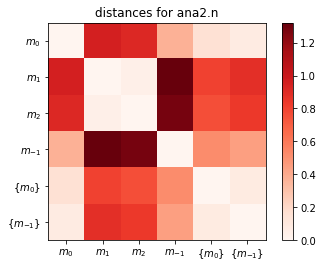

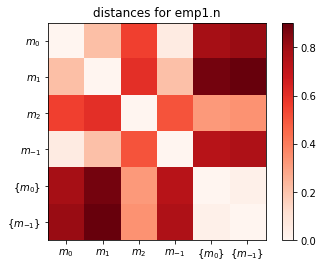

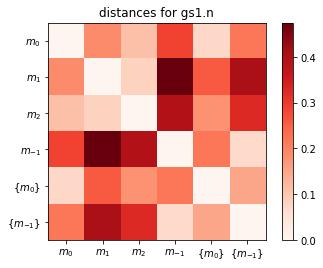

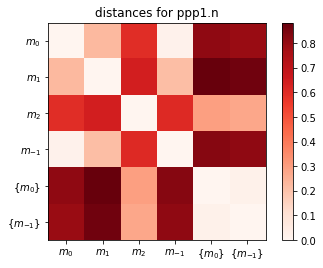

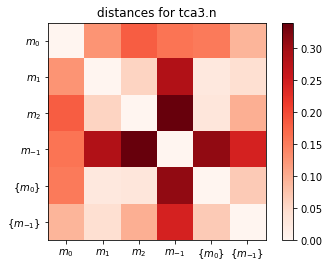

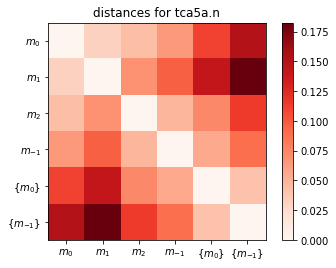

In [18]:
for mm1_single_name in Mm1_single_names:
    
    model_names = [
        r'$m_0$',
        r'$m_1$',
        r'$m_2$',
        r'$m_{-1}$',
        r'$\{m_0\}$',
        r'$\{m_{-1}\}$',
    ]
    
    
    if mm1_single_name not in presentation_fluxes:
        continue
        
    plt.title('distances for ' + mm1_single_name + '.n')
    
    
    d = distances[Mm1_single_names.index(mm1_single_name)]
    
    heatmap = plt.imshow(d, cmap='Reds', interpolation='nearest')
    plt.colorbar(heatmap) 
    plt.xticks(ticks=[0,1,2,3,4,5], labels=model_names)
    plt.yticks(ticks=[0,1,2,3,4,5], labels=model_names)
#     plt.xlabel('model')
#     plt.ylabel('model')
    
    plt.show()
#     plt.hist(
#             m0_single_fluxes.iloc[:,i],
#         density=true,
# #         histtype='step',
#         alpha=0.5,
#         label='m0'
#     )
    
    
#     plt.hist(
#         m0_set_fluxes.iloc[:,i],
#         density=true,
# #         histtype='step',
#         alpha=0.5,
#         label='{m0}'
#     )
    
    
    
#     plt.legend()
#     plt.show()

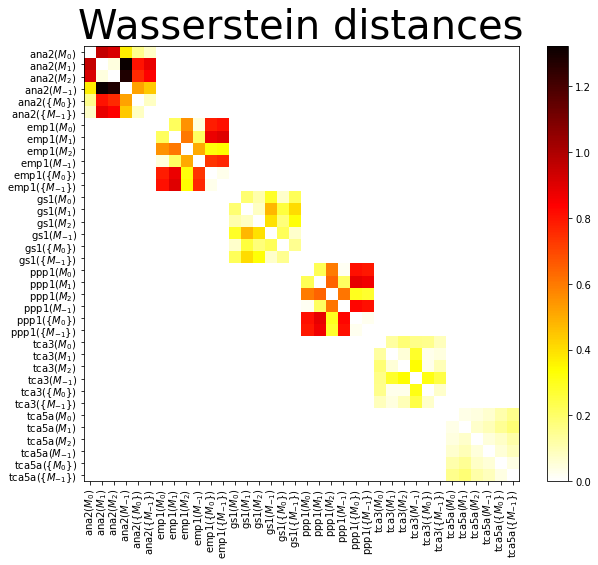

In [60]:
p = presentation_fluxes
big_matrix = np.zeros((len(model_names) * len(p), len(model_names) * len(p)))
model_names = [
    r'$M_0$',
    r'$M_1$',
    r'$M_2$',
    r'$M_{-1}$',
    r'$\{M_0\}$',
    r'$\{M_{-1}\}$',
]

big_model_names = []
matrices_to_keep = []
for index, name in enumerate(M1_single_names):
    if name not in p:
        continue
    for mname in model_names:
        big_model_names.append(name + '('+ mname + ')')
        
    matrices_to_keep.append(distances[index])
    
    
for index, m in enumerate(matrices_to_keep):
#     print(p[index])
#     print(m)
    big_matrix[len(model_names)*index:len(model_names)*(index+1), len(model_names)*index:len(model_names)*(index+1)] = m
        
plt.figure(figsize=(10, 8))
plt.title('Wasserstein distances', fontsize=40)
heatmap = plt.imshow(big_matrix, cmap='hot_r') #, interpolation='nearest'
plt.colorbar(heatmap) 
plt.xticks(ticks=[i for i in range(len(big_model_names))], labels=big_model_names, rotation=90)
plt.yticks(ticks=[i for i in range(len(big_model_names))], labels=big_model_names)
#     plt.xlabel('model')
#     plt.ylabel('model')

plt.show()
#     plt.hist(
#             m0_single_fluxes.iloc[:,i],
#         density=true,
# #         histtype='step',
#         alpha=0.5,
#         label='m0'
#     )
    
    
#     plt.hist(
#         m0_set_fluxes.iloc[:,i],
#         density=true,
# #         histtype='step',
#         alpha=0.5,
#         label='{m0}'
#     )
    
    
    
#     plt.legend()
#     plt.show()